In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
# imports
import sys
sys.path.append("..")
#import os
#import shutil

from utils.model import Net_mask
import torch
#from torch.distributions.multivariate_normal import MultivariateNormal

import matplotlib.pyplot as plt
import numpy as np

In [53]:
num = 15
e = 4

In [54]:
prior_weights = torch.load(f'../data/@/1.0e+0{e}/rml_noise/{num}/noise_parameter.pt')[0]

In [55]:
model = Net_mask()
model.load_state_dict(torch.load('../data/@/weight_init/rml_e4_12.pth'))
init_weights = torch.cat([param.view(-1) for param in model.parameters()])
model.load_state_dict(torch.load(f'../saved_models/testing/rml/long/e{e}/{num}/model_weights.pth'))
posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])

In [56]:
print(init_weights)
print(prior_weights)
print(posterior_weights)

tensor([ 0.1381,  0.1781, -0.1591,  ..., -0.0566,  0.0318,  0.0641],
       grad_fn=<CatBackward0>)
tensor([ 0.1855,  0.0468, -0.0087,  ..., -0.5750, -0.2390,  0.1337])
tensor([-0.0176, -0.1039,  0.0631,  ...,  0.2946,  0.2168, -0.4864],
       grad_fn=<CatBackward0>)


In [57]:
print(torch.sum((init_weights + prior_weights)**2))

tensor(1268.3907, grad_fn=<SumBackward0>)


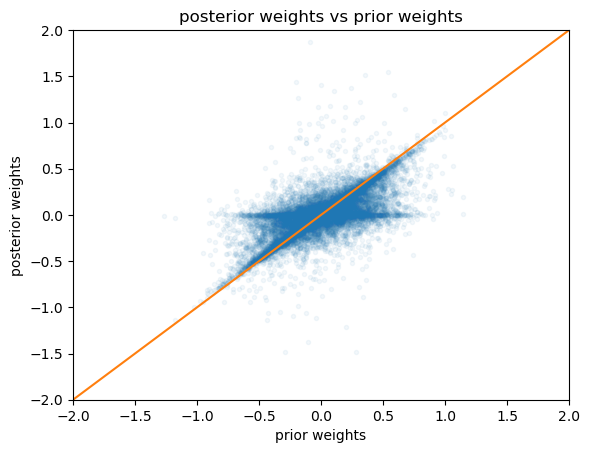

In [58]:
plt.plot(-1*prior_weights.detach(), posterior_weights.detach(), '.', alpha=0.05)
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('prior weights')
plt.ylabel('posterior weights')
plt.title('posterior weights vs prior weights')
plt.savefig(f'../figures/plot_weights/plot_weights.png')

(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   2.,   0.,   1.,   0.,   1.,   0.,   2.,   1.,   0.,   0.,
          1.,   1.,   0.,   0.,   4.,   1.,   0.,   4.,   2.,   2.,   2.,
          2.,   5.,   6.,  10.,   8.,   5.,   7.,   6.,   7.,   9.,  11.,
          8.,   5.,  12.,  17.,  13.,  12.,  18.,  18.,  20.,  25.,  33.,
         33.,  42.,  47.,  50.,  52.,  52.,  65.,  58.,  58.,  60.,  90.,
        110.,  89., 132., 133., 137., 147., 144., 140., 163., 178., 191.,
        211., 202., 227., 232., 279., 306., 304., 334., 370., 382., 430.,
        897., 834., 455., 399., 367., 298., 331., 297., 247., 236., 229.,
        207., 192., 208., 196., 182., 162., 168., 124., 130.,  94., 108.,
        101.,  82., 103.,  70.,  76.,  76.,  60.,  61.,  42.,  50.,  39.,
         25.,  34.,  24.,  29.,  21.,  10.,  18.,  16.,  13.,  15.,  13.,
          9.,   9.,  10.,  13.,  11., 

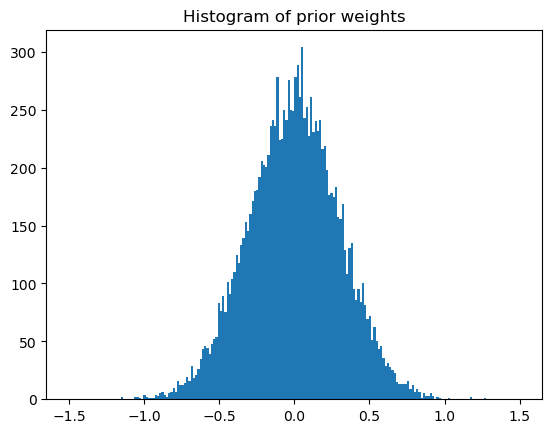

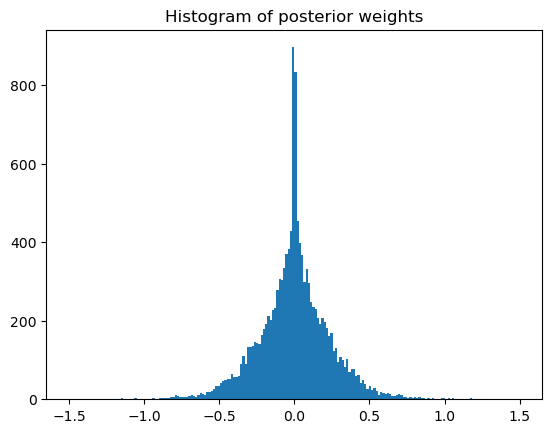

In [59]:
plt.figure(1)
plt.title('Histogram of prior weights')
plt.hist(prior_weights.detach(), range=[-1.5, 1.5], bins=200)
plt.figure(2)
plt.title('Histogram of posterior weights')
plt.hist(posterior_weights.detach(), range=[-1.5, 1.5], bins=200)

In [60]:
sorted_prior, _ = torch.sort(prior_weights)
sorted_posterior, _ = torch.sort(posterior_weights)
print(sorted_prior)
print(sorted_posterior)

tensor([-1.1486, -1.1445, -1.0610,  ...,  1.1779,  1.1781,  1.2645])
tensor([-1.4865, -1.4822, -1.3783,  ...,  1.5132,  1.5446,  1.8678],
       grad_fn=<SortBackward0>)


In [61]:
print(torch.mean(prior_weights))
print(torch.std(prior_weights))
print(torch.mean(posterior_weights))
print(torch.std(posterior_weights))

tensor(-0.0026)
tensor(0.3021)
tensor(0.0007, grad_fn=<MeanBackward0>)
tensor(0.2413, grad_fn=<StdBackward0>)


Text(0, 0.5, 'prior')

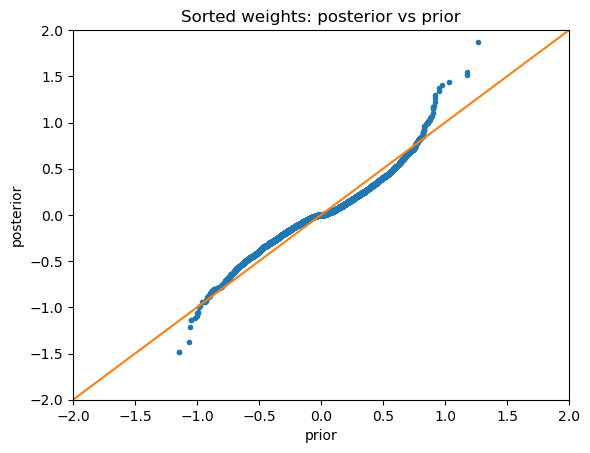

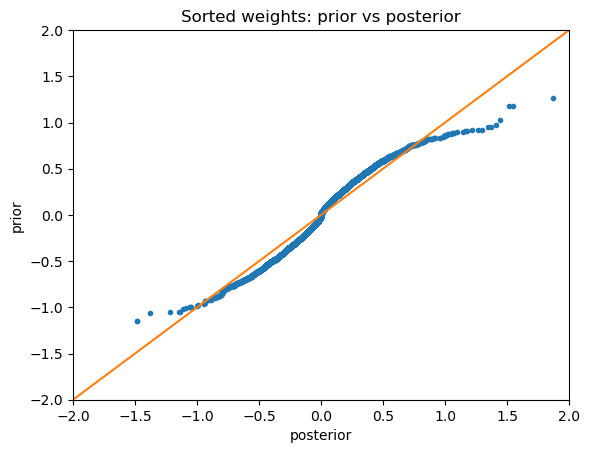

In [62]:
plt.figure()
plt.title('Sorted weights: posterior vs prior')
plt.plot(sorted_prior.detach(), sorted_posterior.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('prior')
plt.ylabel('posterior')
plt.figure()
plt.title('Sorted weights: prior vs posterior')
plt.plot(sorted_posterior.detach(), sorted_prior.detach(), '.')
plt.plot([-2, 2], [-2, 2])
plt.axis([-2, 2, -2, 2])
plt.xlabel('posterior')
plt.ylabel('prior')